# Linear Models

In [1]:
import  warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set()

## Why normal distributions are normal

### 4.1

In [4]:
pos = np.random.uniform(-1, 1, (16, 1000)).sum(axis=0)

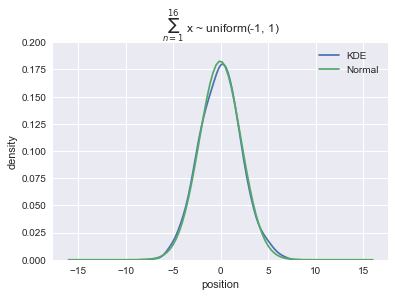

In [5]:
xs = np.linspace(-16, 16, 100)
ys = stats.norm.pdf(xs, loc=np.mean(pos), scale=np.std(pos))
f, ax = plt.subplots(1, 1)
sns.kdeplot(pos, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.set_ylim(0, 0.20)
ax.legend(loc=0)
ax.set_title("$\sum_{n=1}^{16}$ x ~ uniform(-1, 1)", pad=10)
ax.set_xlabel("position")
ax.set_ylabel("density");

### 4.2

In [6]:
(np.random.uniform(1.0, 1.1, 12)).prod()

1.4167124691851858

### 4.3

In [7]:
growth = np.random.uniform(1.0, 1.1, (12, 10000)).prod(axis=0)

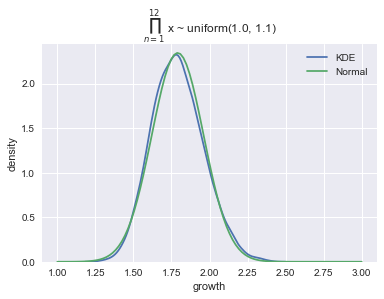

In [8]:
xs = np.linspace(1.0, 3.0, 100)
ys = stats.norm.pdf(xs, loc=np.mean(growth), scale=np.std(growth))

f, ax = plt.subplots(1, 1)
sns.kdeplot(growth, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.1)", pad=12)
ax.set_xlabel("growth")
ax.set_ylabel("density");

### 4.4

In [9]:
big = np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0)
small = np.random.uniform(1.0, 1.01, (12, 10000)).prod(axis=0)

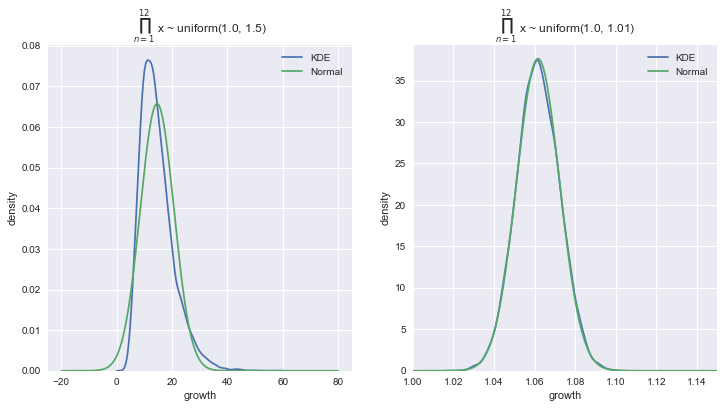

In [10]:
xs_big = np.linspace(-20.0, 80.0, 10000)
ys_big = stats.norm.pdf(xs_big, loc=np.mean(big), scale=np.std(big))
xs_small = np.linspace(1.0, 1.3, 10000)
ys_small = stats.norm.pdf(xs_small, loc=np.mean(small), scale=np.std(small))

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 6)

sns.kdeplot(big, ax=ax1, label="KDE")
ax1.plot(xs_big, ys_big, label="Normal")
ax1.legend(loc=0)
ax1.set_xlabel("growth")
ax1.set_ylabel("density")
ax1.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5)", pad=12)

sns.kdeplot(small, ax=ax2, label="KDE")
ax2.plot(xs_small, ys_small, label="Normal")
ax2.set_xlim(1, 1.15)
ax2.legend(loc=0)
ax2.set_xlabel("growth")
ax2.set_ylabel("density")
ax2.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.01)", pad=12);

### 4.5

In [11]:
log_big = np.log(np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0))

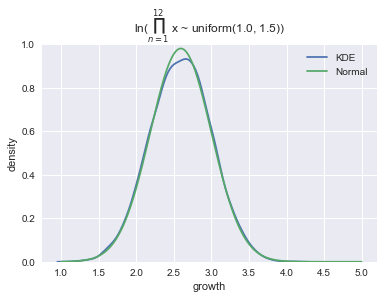

In [12]:
xs = np.linspace(1, 5, 10000)
ys = stats.norm.pdf(xs, loc=np.mean(log_big), scale=np.std(log_big))

f, ax = plt.subplots(1, 1)
sns.kdeplot(log_big, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_xlabel("growth")
ax.set_ylabel("density")
ax.set_title("ln($\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5))", pad=12);
ax.set_ylim(0, 1.0);

## A language for describing models

### 4.6

In [13]:
w = 6; n = 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(w, n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior/sum(posterior)

## A Gaussian model of height

### 4.7

In [14]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

### 4.8

In [15]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.9

In [16]:
d["height"].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### 4.10

In [17]:
d2 = d.loc[d["age"] >= 18]

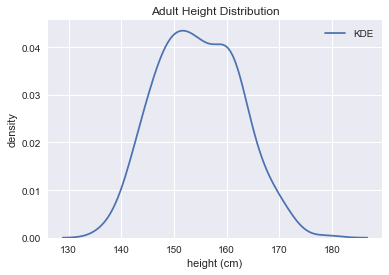

In [18]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(d2["height"], ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Adult Height Distribution");

### 4.11

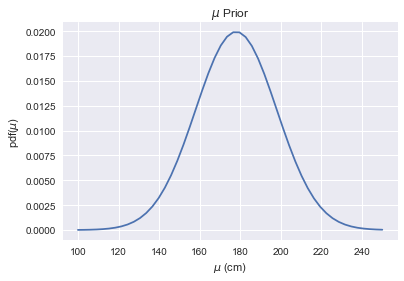

In [19]:
xs = np.linspace(100, 250)
ys = stats.norm.pdf(xs, 178, 20)

f, ax = plt.subplots(1, 1)
ax.plot(xs, ys)
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("pdf($\mu$)")
ax.set_title("$\mu$ Prior");

### 4.12

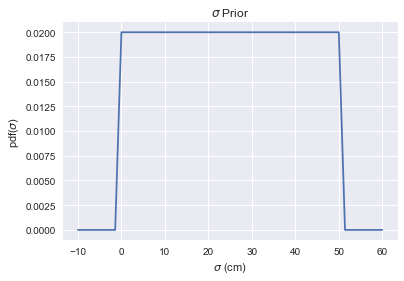

In [20]:
xs = np.linspace(-10, 60)
ys = stats.uniform.pdf(xs, 0, 50)

f, ax = plt.subplots(1, 1)
ax.plot(xs, ys)
ax.set_xlabel("$\sigma$ (cm)")
ax.set_ylabel("pdf($\sigma$)")
ax.set_title("$\sigma$ Prior");

### 4.13

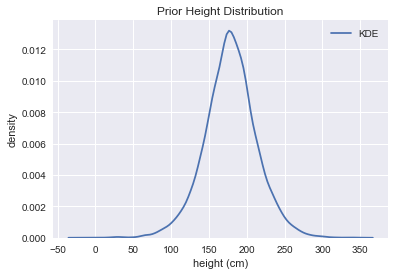

In [21]:
sample_mu = stats.norm.rvs(loc=178, scale=20, size=int(1e4))
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=int(1e4))
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

f, ax = plt.subplots(1, 1)
sns.kdeplot(prior_h, ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Prior Height Distribution");

### 4.14

In [22]:
mu_list = np.linspace(140, 160, 200)
sigma_list = np.linspace(4, 9, 200)
(mu_grid, sigma_grid) = np.meshgrid(mu_list, sigma_list)
post_ll = np.sum([stats.norm.logpdf(height, loc=mu_grid, scale=sigma_grid) 
                  for height in d2["height"]], axis=0)
post_prod = post_ll +\
            stats.norm.logpdf(mu_grid, loc=178, scale=20) +\
            stats.uniform.logpdf(sigma_grid, loc=0, scale=50)
post_prob = np.exp(post_prod - np.max(post_prod))
post_prob = post_prob/post_prob.sum()

### 4.15

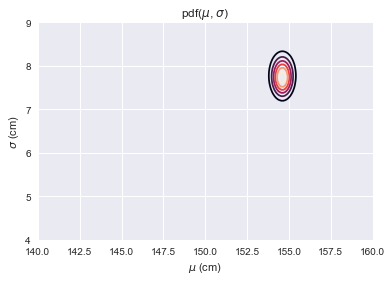

In [23]:
f, ax = plt.subplots(1, 1)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.contour(mu_grid, sigma_grid, post_prob);

### 4.16

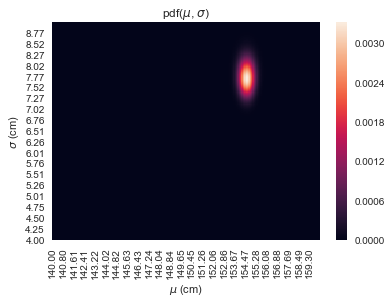

In [24]:
f, ax = plt.subplots(1, 1)
data = pd.DataFrame(post_prob, index=sigma_list, columns=mu_list)
sns.heatmap(data, ax=ax)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.set_xticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_xticklabels()])
ax.set_yticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_yticklabels()])
ax.invert_yaxis();

### 4.17

In [25]:
idxs = np.random.choice(np.arange(len(mu_list)*len(sigma_list)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list)*len(sigma_list)))
sample_mu = mu_list[idxs//len(mu_list)]
sample_sigma = sigma_list[np.mod(idxs, len(sigma_list))]

### 4.18

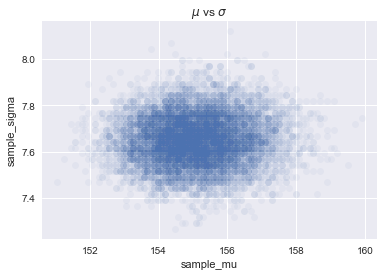

In [26]:
f, ax = plt.subplots(1, 1)
ax.plot(sample_mu, sample_sigma, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.19

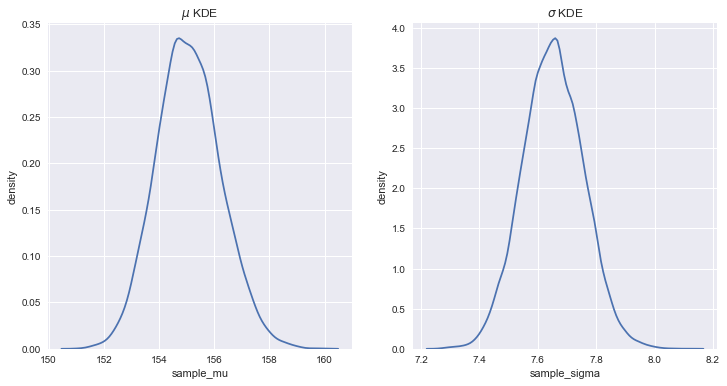

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(12, 6)
sns.kdeplot(sample_mu, ax=ax1)
sns.kdeplot(sample_sigma, ax=ax2)
ax1.set_xlabel("sample_mu")
ax1.set_ylabel("density")
ax1.set_title("$\mu$ KDE")
ax2.set_xlabel("sample_sigma")
ax2.set_ylabel("density")
ax2.set_title("$\sigma$ KDE");

### 4.20

In [28]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([152.7638191 , 157.28643216]), array([7.41708543, 7.81909548]))

### 4.21

In [29]:
d3 = np.random.choice(d2["height"], 20)

### 4.22

In [30]:
mu_list2 = np.linspace(150, 170, 200)
sigma_list2 = np.linspace(4, 20, 200)
(mu_grid2, sigma_grid2) = np.meshgrid(mu_list2, sigma_list2)
post_ll2 = np.sum([stats.norm.logpdf(height, loc=mu_grid2, scale=sigma_grid2) 
                   for height in d3], axis=0)
post_prod2 = post_ll2 +\
             stats.norm.logpdf(mu_grid2, loc=178, scale=20) +\
             stats.uniform.logpdf(sigma_grid2, loc=0, scale=50)
post_prob2 = np.exp(post_prod2 - np.max(post_prod2))
post_prob2 = post_prob2/post_prob2.sum()

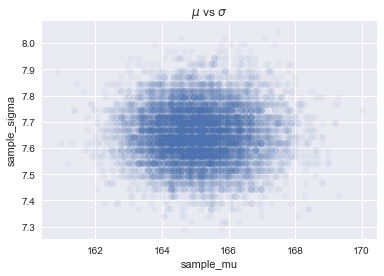

In [31]:
idxs = np.random.choice(np.arange(len(mu_list2)*len(sigma_list2)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list2)*len(sigma_list2)))
sample_mu2 = mu_list2[idxs//len(mu_list2)]
sample_sigma2 = sigma_list[np.mod(idxs, len(sigma_list2))]

f, ax = plt.subplots(1, 1)
ax.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.23

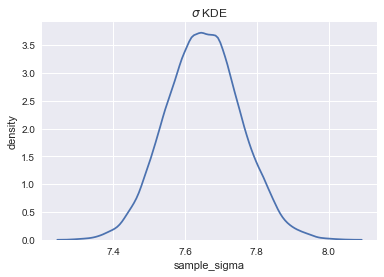

In [32]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(sample_sigma2, ax=ax)
ax.set_xlabel("sample_sigma")
ax.set_ylabel("density")
ax.set_title("$\sigma$ KDE");

### 4.24

In [33]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >=18]

### 4.25

In [34]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

### 4.26

Since I'm using the PyMC3's [recommended implementation](https://github.com/pymc-devs/resources/blob/master/Rethinking/Chp_04.ipynb) for this book, I'll follow their lead in switching directly to MCMC.

In [35]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1816.41draws/s]


### 4.27

Since these values are estimated from samples, the values will be slightly different from those given by `find_MAP`

In [36]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.62,0.40,0.01,154.0,155.27,2161.69,1.0
sigma,7.76,0.29,0.01,7.3,8.23,1955.64,1.0


### 4.28

In [37]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2["height"].mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2["height"].std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

In [38]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

pm.summary(trace_4_1, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:04<00:00, 906.59draws/s] 


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.61,0.41,0.01,153.94,155.25,1905.24,1.0
sigma,7.76,0.30,0.01,7.32,8.28,1870.51,1.0


### 4.29

In [39]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_2 = pm.sample(1000, tune=1000)

pm.summary(trace_4_2, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1568.31draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.86,0.10,0.00,177.7,178.01,1929.99,1.0
sigma,24.65,0.94,0.02,23.2,26.19,1838.67,1.0


### 4.30

In [40]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.169702,0.003297
sigma,0.003297,0.092306


### 4.31

In [41]:
print(np.diag(trace_df.cov()))
print(trace_df.corr())

[0.16970153 0.09230628]
             mu     sigma
mu     1.000000  0.026341
sigma  0.026341  1.000000


### 4.32

Increasing the number of samples

In [42]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_1 = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1)
    
post.head()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [1:25:37<00:00, 115.58draws/s] 


,mu,sigma
0,154.485302,7.442476
1,154.486716,7.877979
2,154.227705,7.636375
3,154.833991,7.878500
4,154.699896,7.561019


### 4.33

In [43]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.61,0.41,0.0,153.96,155.27,20926.13,1.0
sigma,7.77,0.30,0.0,7.28,8.23,20691.73,1.0


### 4.34

In [44]:
stats.multivariate_normal.rvs(mean=post.mean(), cov=post.cov(), size=10)

array([[155.14720798,   7.92178099],
       [154.47203488,   8.15233347],
       [154.80488224,   7.85224542],
       [154.85486871,   7.0818201 ],
       [155.02074299,   7.88597777],
       [155.30259294,   7.19896459],
       [154.86298179,   8.1119454 ],
       [154.9309269 ,   7.92473362],
       [154.32956028,   7.39264677],
       [154.56021727,   7.94159828]])

### 4.35

In [45]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    log_sigma = pm.Normal('log_sigma', mu=2, sd=10)
    height = pm.Normal("height", mu=mu, sd=np.exp(log_sigma), observed=d2["height"])

### 4.36

In [46]:
with m4_1_logsigma:
    trace_4_1_logsigma = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1_logsigma)
    sigma = np.exp(post["log_sigma"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:14<00:00, 1497.54draws/s]


## Adding a Predictor

### 4.37

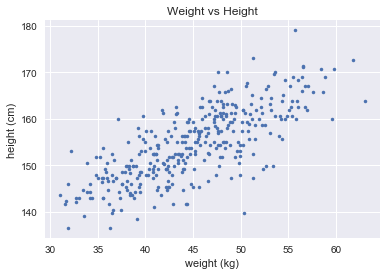

In [47]:
f, ax = plt.subplots(1, 1)
ax.plot(d2["weight"], d2["height"], ".")
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Weight vs Height");

### 4.38 - 4.39

In [48]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

with pm.Model() as m4_3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*d2["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [01:45<00:00, 209.52draws/s]


### 4.40

In [49]:
pm.summary(trace_4_3, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
b,0.90,0.04,0.00,0.83,0.97,7413.82,1.0
a,113.92,1.91,0.02,110.90,116.98,7445.01,1.0
sigma,5.10,0.20,0.00,4.79,5.42,8892.71,1.0


### 4.41

In [50]:
trace_df = pm.trace_to_dataframe(trace_4_3)
trace_df.corr().round(2)

,b,a,sigma
b,1.00,-0.99,0.01
a,-0.99,1.00,-0.01
sigma,0.01,-0.01,1.00


### 4.42

In [51]:
d2 = d2.assign(weight_c=d2["weight"] - d2["weight"].mean())

### 4.43

In [52]:
with pm.Model() as m4_4:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*d2["weight_c"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_4 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:17<00:00, 1232.10draws/s]


### 4.44

In [53]:
trace_df = pm.trace_to_dataframe(trace_4_4)
(pm.summary(trace_4_4, alpha=.11)
 .join(trace_df.corr())
 .round())

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat,b,a,sigma
b,1.0,0.0,0.0,1.0,1.0,28480.0,1.0,1.0,0.0,-0.0
a,155.0,0.0,0.0,154.0,155.0,30370.0,1.0,0.0,1.0,-0.0
sigma,5.0,0.0,0.0,5.0,5.0,31059.0,1.0,-0.0,-0.0,1.0


### 4.45

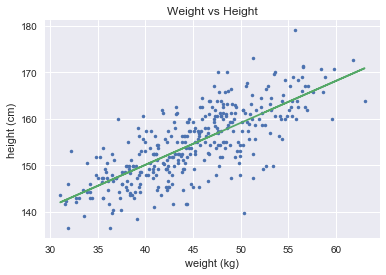

In [54]:
f, ax = plt.subplots(1, 1)
ax.plot(d2["weight"], d2["height"], ".")
ax.plot(d2["weight"], trace_4_3["a"].mean() + d2["weight"]*trace_4_3["b"].mean())
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Weight vs Height");

### 4.46

In [55]:
post = pm.trace_to_dataframe(trace_4_3)

### 4.47

In [56]:
post[:5]

,b,a,sigma
0,0.926289,112.476549,5.234632
1,0.918513,112.905540,4.997443
2,0.905220,113.841414,4.781757
3,0.883636,114.507563,5.104752
4,0.934014,112.916536,5.102079


### 4.48

In [57]:
N = 10
dN = d2[:N]

with pm.Model() as mN:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*dN["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN["height"])
    trace_N = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [01:10<00:00, 310.64draws/s]
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
There were 240 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6788871875704638, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


### 4.49

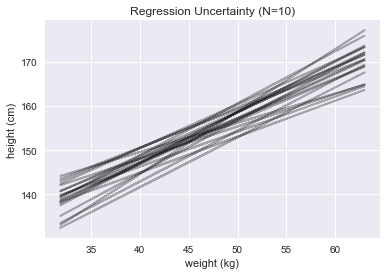

In [58]:
post = pm.trace_to_dataframe(trace_N)[:20]

f, ax = plt.subplots(1, 1)
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Regression Uncertainty (N=10)");

for i in range(len(post)):
    ax.plot(dN["weight"], post["a"].iloc[i] + dN["weight"]*post["b"].iloc[i], alpha=0.3, color="black");

### 4.50

In [59]:
N = 352
dN = d2[:N]

with pm.Model() as mN:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*dN["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN["height"])
    trace_N = pm.sample(int(1e4), tune=1000)
    
post = pm.trace_to_dataframe(trace_N)[:20]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [1:29:16<00:00,  4.11draws/s]   


In [60]:
mu_at_50 = post["a"] + post["b"] * 50

### 4.51

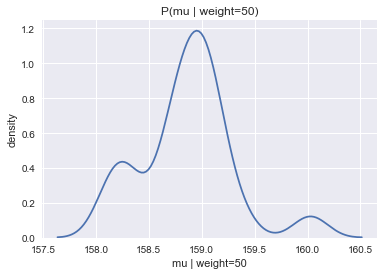

In [61]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(mu_at_50, ax=ax)
ax.set_xlabel("mu | weight=50")
ax.set_ylabel("density")
ax.set_title("P(mu | weight=50)");

### 4.52

In [62]:
pm.hpd(mu_at_50, alpha=0.11)

array([158.1209771 , 159.14403442])

### 4.53

I need to add `mu` as an explicitly calculated deterministic variable to the model in order to get samples around the height data

In [63]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

with pm.Model() as m4_3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = pm.Deterministic("mu", a + b*d2["weight"])
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [02:26<00:00, 150.51draws/s]


In [64]:
mu = pm.trace_to_dataframe(trace_4_3).filter(regex="mu\_*")
mu.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
0,157.410005,146.226801,141.669646,162.554278,150.951704,172.367539,147.960198,164.958667,144.633194,163.980137,...,153.663631,157.465921,149.106476,150.728040,150.504376,156.627180,144.018118,161.687580,163.560767,162.051034
1,157.771108,146.354618,141.702398,163.022694,151.178085,173.040664,148.124174,165.477239,144.727768,164.478296,...,153.946584,157.828190,149.294364,150.949755,150.721425,156.971954,144.099861,162.137916,164.050178,162.508951
2,157.113501,145.692051,141.037810,162.367368,150.517614,172.389691,147.462376,164.822980,144.064494,163.823603,...,153.287315,157.170608,148.633074,150.289185,150.060755,156.314000,143.436314,161.482206,163.395299,161.853403
3,157.005243,146.538062,142.272686,161.820146,150.960446,171.005097,148.160475,164.070590,145.046489,163.154711,...,153.498737,157.057579,149.233361,150.751103,150.541759,156.272540,144.470794,161.008939,162.762192,161.349123
4,156.952510,146.630496,142.424276,161.700636,150.991547,170.758202,148.230408,163.919868,145.159610,163.016692,...,153.494635,157.004120,149.288415,150.785107,150.578666,156.229969,144.591899,160.900680,162.629617,161.236145


### 4.54

In [65]:
weight_seq = np.arange(25, 71)
mu = trace_4_3["a"].reshape(20000, 1) + np.multiply(trace_4_3["b"].reshape(20000, 1), weight_seq)
mu.shape

(20000, 46)

### 4.55

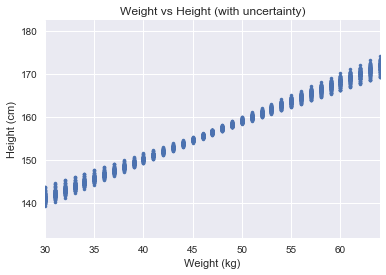

In [66]:
f, ax = plt.subplots(1, 1)
ax.plot(weight_seq, mu[:100].T, "C0.")
ax.set_title("Weight vs Height (with uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.56

In [67]:
mu_mean = mu.mean(axis=0)
mu_hpdi = pm.hpd(mu, alpha=.11)

### 4.57

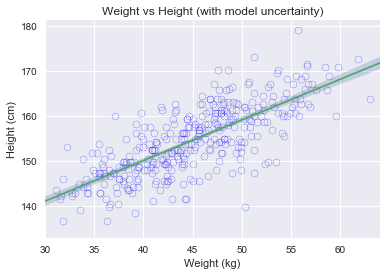

In [68]:
f, ax = plt.subplots(1, 1)
ax.plot(d2["weight"], d2["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25)
ax.set_title("Weight vs Height (with model uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.58

Since I implemented this manually earlier, the code is the same as in [4.58](#4.54)

### 4.59

In [69]:
sigma = trace_4_3["sigma"].repeat(len(weight_seq)).reshape(len(weight_seq), 20000).T
sim_height = stats.norm.rvs(loc=mu, scale=sigma)
sim_height.shape

(20000, 46)

### 4.60

In [70]:
height_pi = pm.hpd(sim_height, alpha=0.11)

### 4.61

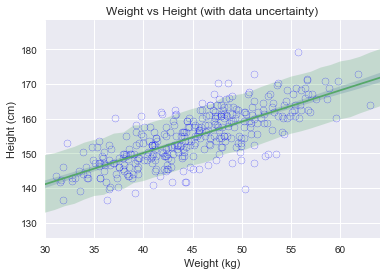

In [71]:
f, ax = plt.subplots(1, 1)
ax.plot(d2["weight"], d2["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight vs Height (with data uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.62

Since `trace_4_3` already has 10k samples, and `pm.sample_ppc` defaults to the length of the trace, this has already been done in [4.59](#4.59)

### 4.63

Since I implemented this manually earlier, the code is the same as in [4.59](#4.59)

## Polynomial Regression

### 4.64

In [72]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.65

In [73]:
d["weight_s"] = (d["weight"] - d["weight"].mean())/d["weight"].std()

### 4.66

In [74]:
d["weight_s2"] = d["weight_s"]**2
with pm.Model() as m4_5:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b2", mu=0, sd=10)
    b1 = pm.Normal("b1", mu=0, sd=10)
    a = pm.Normal("a", mu=178, sd=100)
    mu = a + b1*d["weight_s"] + b2*d["weight_s2"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_5 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b1, b2, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [01:00<00:00, 363.22draws/s] 


In [75]:
pm.summary(trace_4_5).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b2,-8.41,0.28,0.0,-8.97,-7.87,11506.59,1.0
b1,21.40,0.29,0.0,20.81,21.96,14188.50,1.0
a,146.66,0.37,0.0,145.91,147.38,12012.96,1.0
sigma,5.78,0.18,0.0,5.44,6.13,15941.98,1.0


### 4.68

In [76]:
weight_seq = np.linspace(-2.2, 2, 30)

mu = trace_4_5["a"].reshape(20000, 1) +\
     np.multiply(trace_4_5["b1"].reshape(20000, 1), weight_seq) +\
     np.multiply(trace_4_5["b2"].reshape(20000, 1), weight_seq**2)

sigma = (trace_4_5["sigma"]
         .repeat(len(weight_seq))
         .reshape(len(weight_seq), 20000)
         .T)

mu_mean = mu.mean(axis=0)
mu_pi = pm.hpd(mu, alpha=.11)

sim_height = stats.norm.rvs(loc=mu, scale=sigma)
height_pi = pm.hpd(sim_height, alpha=0.11)

### 4.69

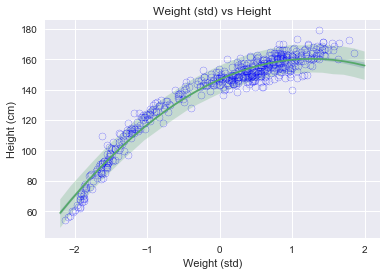

In [77]:
f, ax = plt.subplots(1, 1)
ax.plot(d["weight_s"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight (std) vs Height")
ax.set_xlabel("Weight (std)")
ax.set_ylabel("Height (cm)");

### 4.70

In [78]:
d["weight_s3"] = d["weight_s"]**3
with pm.Model() as m4_6:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b3", mu=0, sd=10)
    b2 = pm.Normal("b2", mu=0, sd=10)
    b1 = pm.Normal("b1", mu=0, sd=10)
    a = pm.Normal("a", mu=178, sd=100)
    mu = a + b1*d["weight_s"] + b2*d["weight_s2"] + b2*d["weight_s3"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_6 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b1, b2, b3, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [01:05<00:00, 336.95draws/s] 


### 4.71 - 4.72

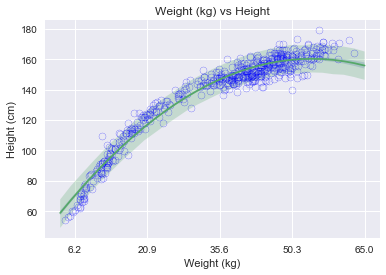

In [79]:
f, ax = plt.subplots(1, 1)
ax.plot(d["weight_s"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25)
at = np.arange(-2, 3)
ax.set_xticks(at)
ax.set_xticklabels(np.round(at * d.weight.std() + d.weight.mean(), 1))
ax.set_title("Weight (kg) vs Height")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)");